In [4]:
# 선형회귀 (Linear Regression)

# 널리 사용되는 대표적인 회귀 알고리즘
# 비교적 간단하고, 성능이 뛰어나기 때문에 회귀모델 수행 시 초반에 주로 진행
# 선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선(추세선)을 찾아내는 것
# 훈련(fit), 평가(score), 예측(predict) 함수는 모두 기존과 동일

# 데이터프레임 패키지
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

# 데이터 셋 분류
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,
                                                                      random_state=42)
# input 데이터에 대해서는 행렬의 2차원으로 만들어야함
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [10]:
# 모델 생성
lr = LinearRegression()
lr

LinearRegression()

In [11]:
# 모델 훈련 시키기
lr.fit(train_input,train_target)

LinearRegression()

In [12]:
### KNN에서 농어의 길이 50을 1033으로 예측
### 선형회귀모델은 50을 어떻게 예측할까?
# 2차원이니 하나씩 리스트로 묶어서.
print(lr.predict([[50], [100]]))

[1241.83860323 3192.69585141]


In [13]:
# 기울기와 y 절편 확인하기
# 선형회귀모델 : y = a * x + b

print("기울기 = ", lr.coef_, "\n 절편 = ", lr.intercept_)

기울기 =  [39.01714496] 
 절편 =  -709.0186449535477


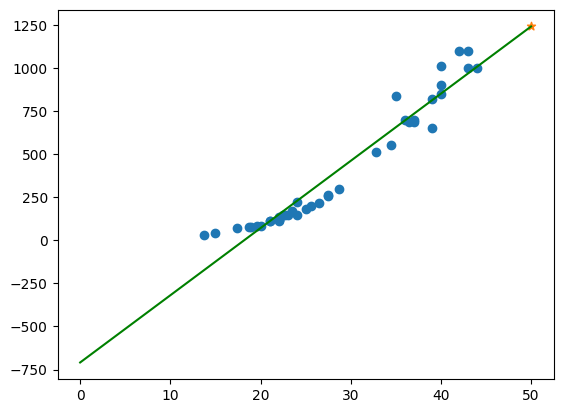

In [17]:
# 산점도 그리기
# 훈련데이터, 50길이, 추세선 모두 그리기

plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[50]]), marker='*')
plt.plot([0,50], [lr.coef_ * 0 + lr.intercept_,
                 lr.coef_ * 50 + lr.intercept_],c="g")

In [15]:
# 선형회귀모델 과적합 여부 확인
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

# 해석
# 다소 과대적합이 보이기는 하지만, 그래도 사용해도 될 정도의 훈련모델
# 다만, 과대적합이 의심하지 않을 수 없다

0.939846333997604
0.8247503123313558


In [19]:
# 다항회귀
# x의 제곱승 값과, x값 두개 필요
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape,test_poly.shape)


(42, 2) (14, 2)


In [20]:
# 훈련 모델 생성
lr = LinearRegression()
# 훈련
lr.fit(train_poly,train_target)

LinearRegression()

In [21]:
# 기울기와 y 절편 확인하기
# 선형회귀모델 : y = a * x^2 + b * x + c

print("기울기 = ", lr.coef_, "\n 절편 = ", lr.intercept_)

기울기 =  [  1.01433211 -21.55792498] 
 절편 =  116.05021078278259


In [22]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


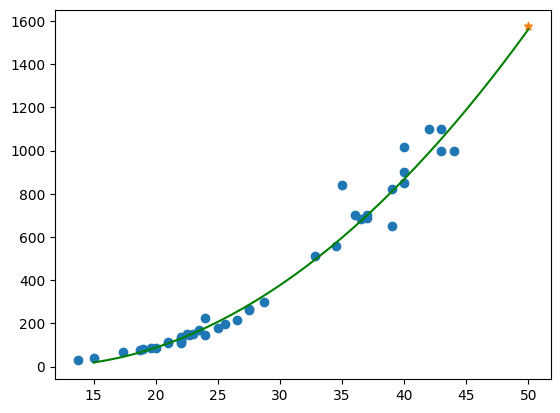

In [24]:
# 산점도 그리기
# 훈련데이터, 50길이, 추세선 모두 그리기

point = np.arange(15,51)

plt.scatter(train_input, train_target)
plt.scatter([50], [1574], marker='*')
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05,c="g")

In [26]:
# 다항 선형회귀모델 과적합 여부 확인
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

# 해석 
# 과소적합 발생 / 미세하기에 그대로 사용할 수 있지만 과소적합이 일어난 경우의 방안을 이용
# 데이터 양과 복잡도 늘리기
# 선형회귀 모델에서는 복잡도를 늘리기 위해 여러개의 특성(독립변수)을 생성해 사용
# -> 특성을 늘리는것 -> 다중회귀 분석 수행 -> 독립변수가 여러개

0.9706807451768623
0.9775935108325121
